In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Load the dataset
df = pd.read_csv('social_media_data.csv')


In [4]:

# Display the first few rows of the dataset
df.head()


,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


In [6]:

# Get basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2000 non-null   object 
 1   platform   2000 non-null   object 
 2   post_type  2000 non-null   object 
 3   likes      1992 non-null   float64
 4   shares     1992 non-null   float64
 5   comments   1992 non-null   float64
 6   views      1990 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [8]:

# Check for missing values
df.isnull().sum()


date          0
platform      0
post_type     0
likes         8
shares        8
comments      8
views        10
dtype: int64

In [9]:

# Calculate total likes, shares, comments, and views (for videos)
total_likes = df['likes'].sum()
total_shares = df['shares'].sum()
total_comments = df['comments'].sum()
total_views = df[df['post_type'] == 'video']['views'].sum()

print(f'Total Likes: {total_likes}')
print(f'Total Shares: {total_shares}')
print(f'Total Comments: {total_comments}')
print(f'Total Views (for videos): {total_views}')


Total Likes: 2569272.0
Total Shares: 990595.0
Total Comments: 609249.0
Total Views (for videos): 4464731.0


In [10]:

# Calculate engagement
df['engagement'] = df['likes'] + df['shares'] + df['comments']


In [11]:

# Group by platform and calculate total engagement
platform_engagement = df.groupby('platform')['engagement'].sum()


In [14]:

# Find the platform with the highest engagement
highest_engagement_platform = platform_engagement.idxmax()
highest_engagement_value = platform_engagement.max()

print(f'Platform with highest engagement: {highest_engagement_platform} ({highest_engagement_value} engagements)')

Platform with highest engagement: Instagram (1405244.0 engagements)


In [16]:

# Group by platform and calculate average likes, shares, comments, and views
average_metrics = df.groupby('platform').mean()

print('Average Metrics per Post on Each Platform:')
average_metrics[['likes', 'shares', 'comments', 'views']]


Average Metrics per Post on Each Platform:


,likes,shares,comments,views
platform,,,,
Facebook,1289.982428,513.141494,311.160317,6984.239234
Instagram,1305.837278,497.372404,301.046062,6905.875556
NonExistingPlatform,1150.166667,515.833333,285.500000,6729.166667
Twitter,1274.994152,482.437775,305.857980,7013.258065


In [18]:

# Group by platform and post type, then count the number of posts
post_type_counts = df.groupby(['platform', 'post_type']).size().unstack(fill_value=0)

print('Total Number of Each Type of Post on Each Platform:')
post_type_counts


Total Number of Each Type of Post on Each Platform:


post_type,image,text,video
platform,,,
Facebook,218,204,209
Instagram,267,203,208
NonExistingPlatform,1,3,2
Twitter,249,219,217


In [19]:

# Group by post type and calculate average engagement
average_engagement_post_type = df.groupby('post_type')['engagement'].mean()


In [20]:

# Find the post type with the highest average engagement
highest_avg_engagement_post_type = average_engagement_post_type.idxmax()
highest_avg_engagement_value = average_engagement_post_type.max()

print(f'Post type with highest average engagement: {highest_avg_engagement_post_type} ({highest_avg_engagement_value} average engagements)')


Post type with highest average engagement: text (2128.542071197411 average engagements)


In [21]:

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the quarter from the date
df['quarter'] = df['date'].dt.to_period('Q')


In [25]:

# Group by quarter and calculate total engagement
quarterly_engagement = df.groupby('quarter')['engagement'].sum()

print('Total Engagement in Each Quarter:')
print(quarterly_engagement)


Total Engagement in Each Quarter:
quarter
2022Q4     938895.0
2023Q1    1025381.0
2023Q2    1000644.0
2023Q3     978372.0
2023Q4     192516.0
Freq: Q-DEC, Name: engagement, dtype: float64


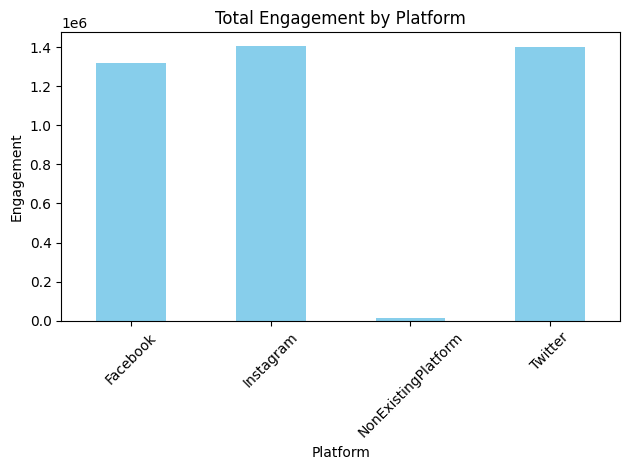

In [26]:

# Visualizations
# Total engagement by platform
platform_engagement.plot(kind='bar', title='Total Engagement by Platform', color='skyblue')
plt.ylabel('Engagement')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


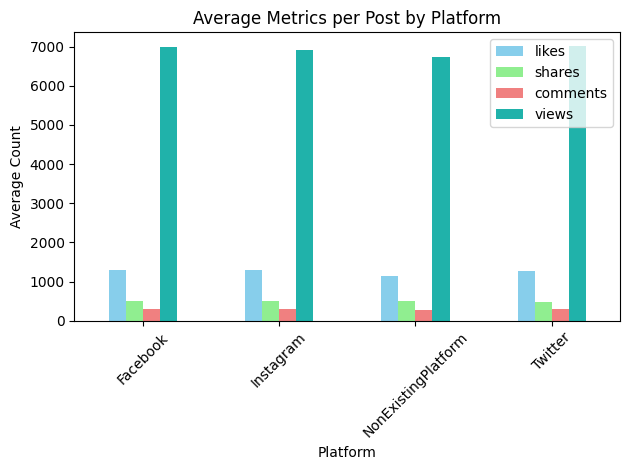

In [27]:

# Average metrics per post by platform
average_metrics[['likes', 'shares', 'comments', 'views']].plot(kind='bar', title='Average Metrics per Post by Platform', color=['skyblue', 'lightgreen', 'lightcoral', 'lightseagreen'])
plt.ylabel('Average Count')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


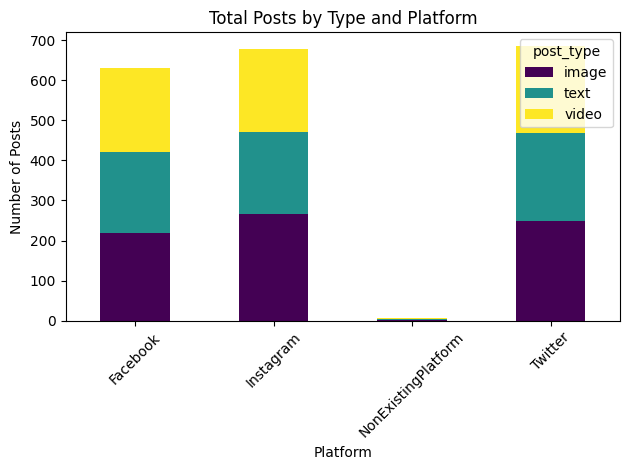

In [28]:

# Total posts by type and platform
post_type_counts.plot(kind='bar', stacked=True, title='Total Posts by Type and Platform', colormap='viridis')
plt.ylabel('Number of Posts')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


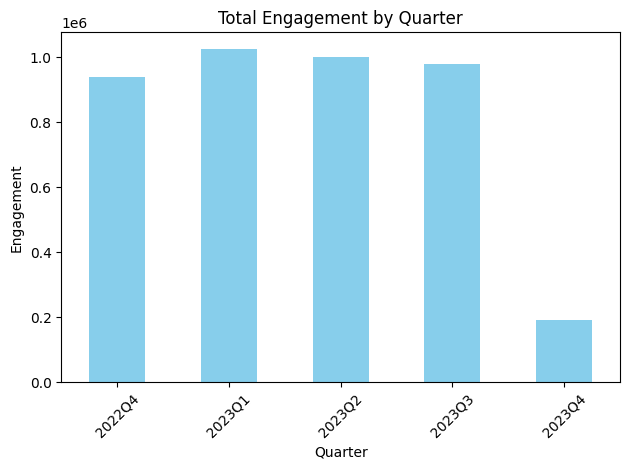

In [29]:

# Quarterly engagement
quarterly_engagement.plot(kind='bar', title='Total Engagement by Quarter', color='skyblue')
plt.ylabel('Engagement')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
